<a href="https://colab.research.google.com/github/DrUkachi/Optical-Character-Recognition-app/blob/main/ocr_prediction_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OCR Prediction 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# !zip -r ocr_zip /content/drive/MyDrive/ocr_models/


Scanning files 
  adding: content/drive/MyDrive/ocr_models/ (stored 0%)
  adding: content/drive/MyDrive/ocr_models/craft_mlt_25k.pth (deflated 7%)
  adding: content/drive/MyDrive/ocr_models/None-VGG-BiLSTM-CTC (will be deprecated).pth (deflated 7%)
  adding: content/drive/MyDrive/ocr_models/None-VGG-None-CTC.pth (deflated 7%)
  adding: content/drive/MyDrive/ocr_models/TPS-ResNet-BiLSTM-CTC.pth (deflated 7%)
  adding: content/drive/MyDrive/ocr_models/TPS-ResNet-BiLSTM-Attn.pth (deflated 7%)
  adding: content/drive/MyDrive/ocr_models/pipeline.py (deflated 63%)
  adding: content/drive/MyDrive/ocr_models/predict.py (deflated 67%)
  adding: content/drive/MyDrive/ocr_models/crop_words.py (deflated 64%)
  adding: content/drive/MyDrive/ocr_models/images/ (stored 0%)
  adding: content/drive/MyDrive/ocr_models/images/kenya2.jpeg (deflated 0%)
  adding: content/drive/MyDrive/ocr_models/images/kenya3.jpeg (deflated 1%)
  adding: content/drive/MyDrive/ocr_models/images/kenya4.jpeg (deflated 1%)
  a

In [ ]:
!pip install craft-text-detector

In [ ]:
import cv2
import time
import pandas as pd
import numpy as np
import os

from IPython.core.display import display, HTML
from PIL import Image
import base64
import io

# import craft functions
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)

# set image path and export folder directory
image_dir = "/content/drive/MyDrive/ocr_models/images/"
output_dir = '/content/drive/MyDrive/ocr_models/cropped_images/'

for path in os.listdir(image_dir):
  full_path = os.path.join(image_dir, path)
  if os.path.isfile(full_path):
    image_path = full_path
  # image_path = '/content/drive/MyDrive/ocr_models/images/kenya4.jpeg'
  # read image
  image = read_image(image_path)
  # load models
  refine_net = load_refinenet_model(cuda=True)
  craft_net = load_craftnet_model(cuda=True)
  # perform prediction
  prediction_result = get_prediction(
    image=image,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.7,
    link_threshold=0.4,
    low_text=0.4,
    cuda=True,
    long_size=1280
)

  # export detected text regions
  exported_file_paths = export_detected_regions(
    image_path=image_path,
    image=image,
    regions=prediction_result["boxes"],
    output_dir=output_dir,
    rectify=True
)

# export heatmap, detection points, box visualization
  export_extra_results(
    image_path=image_path,
    image=image,
    regions=prediction_result["boxes"],
    heatmaps=prediction_result["heatmaps"],
    output_dir=output_dir
)

# unload models from gpu
empty_cuda_cache()

/usr/local/lib/python3.7/dist-packages/craft_text_detector/craft_utils.py:403: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  polys = np.array(polys)
/usr/local/lib/python3.7/dist-packages/craft_text_detector/predict.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  polys_as_ratio = np.array(polys_as_ratio)


In [ ]:
from subprocess import call
call("""python3 /content/drive/MyDrive/ocr_models/deep-text-recognition-benchmark/eval.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder "/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops" \
--saved_model "/content/drive/MyDrive/ocr_models/TPS-ResNet-BiLSTM-Attn-case-sensitive.pth" --sensitive""", shell=True)

0

In [ ]:
!python3 /content/drive/MyDrive/ocr_models/deep-text-recognition-benchmark/eval.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder "/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops" \
--saved_model "/content/drive/MyDrive/ocr_models/TPS-ResNet-BiLSTM-Attn-case-sensitive.pth" --sensitive

model input parameters 32 100 20 1 512 256 96 25 TPS ResNet BiLSTM Attn
loading pretrained model from /content/drive/MyDrive/ocr_models/TPS-ResNet-BiLSTM-Attn-case-sensitive.pth
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
--------------------------------------------------------------------------------
image_path               	 predicted_labels         	 confidence score
--------------------------------------------------------------------------------
crop_0.png               	 DRIVINGLICENCE           	 0.9886
crop_1.png               	 REPUBLICOFKENYA          	 0.9794
crop_2.png 

,img,id,label,conf
0,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_0.png,DRIVINGLICENCE,0.9886
1,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_1.png,REPUBLICOFKENYA,0.9794
2,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_2.png,JAMHURLYAKENYA,0.8651
3,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_3.png,SURNAME,0.9986
4,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_4.png,SAVANI,0.9736
5,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_5.png,OTHERNAMES,0.9162
6,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_6.png,sailesh.dal.suk-ral,0.0018
7,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_7.png,NATIONALIDNO,0.6558
8,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_8.png,LICENSENO,0.3868
9,,/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/crop_9.png,14496000,0.9612

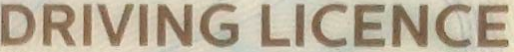
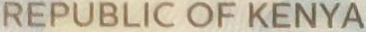
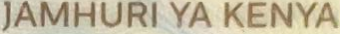
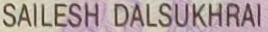
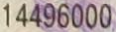
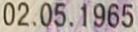
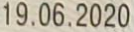
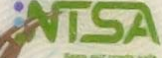
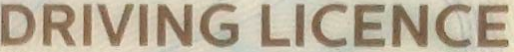
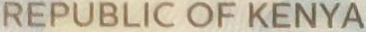
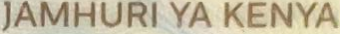
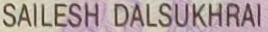
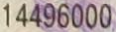
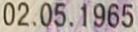
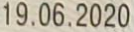
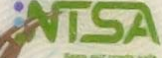
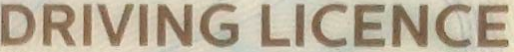
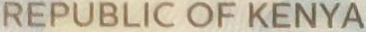
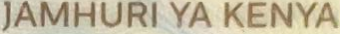
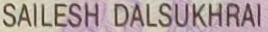
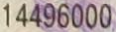
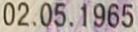
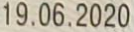
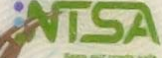

In [ ]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
result = open("/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/_log_demo_result_vgg.txt", "r")
for ind, row in enumerate(result):
  row = row.split("\t")
  filename = f"/content/drive/MyDrive/ocr_models/cropped_images/kenya2_crops/{row[0].strip()}"
  label = row[1].strip()
  confidence = row[2].strip()
  image = Image.open(filename)
  img_buffer = io.BytesIO()
  image.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8")

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = confidence

html_all = data.to_html(escape=False)
display(HTML(html_all))